In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
os.chdir('C:\\Users\\jeevi\\Desktop\\PGA15')
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,roc_curve,cohen_kappa_score,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit,GridSearchCV,train_test_split
from imblearn.over_sampling import SMOTE
from statsmodels.api import Logit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline

In [14]:
pd.set_option('display.max_columns', 60)

In [15]:
df = pd.read_csv('bank.csv',delimiter=';')

In [16]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [17]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

### Missing value annalysis

In [18]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [213]:
# separating depedent and independent variable

In [19]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [20]:
x_num = x.select_dtypes(include=['int64','float64','int32','float32'])

In [21]:
x_cat = x.select_dtypes(include=['object'])

In [22]:
x_cat

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [23]:
x_num

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [24]:
x_num.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


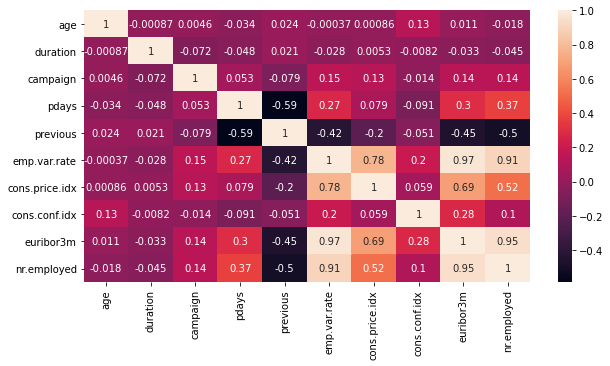

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(x_num.corr(),annot=True)
plt.show()

In [26]:
x_num.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [27]:
x_num_con = x_num.loc[:,['age', 'duration','emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

In [28]:
x_num_con.corr()

,age,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
emp.var.rate,-0.000371,-0.027968,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.906970,0.522034,0.100513,0.945154,1.000000


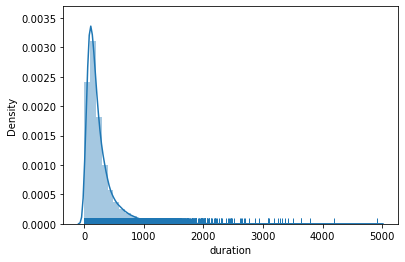

In [29]:
sns.distplot(df['duration'],rug=True)
plt.show()

In [17]:
x_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [43]:
x_cat_nominal = x_cat.loc[:,['job', 'marital']]

In [44]:
drop_col = x_cat.loc[:,['contact',
       'month', 'day_of_week']]

In [45]:
x_cat_ordinal = x_cat.loc[:,['education','poutcome','default', 'housing', 'loan']]

In [47]:
x_cat_ordinal

,education,poutcome,default,housing,loan
0,basic.4y,nonexistent,no,no,no
1,high.school,nonexistent,unknown,no,no
2,high.school,nonexistent,no,yes,no
3,basic.6y,nonexistent,no,no,no
4,high.school,nonexistent,no,no,yes
...,...,...,...,...,...
41183,professional.course,nonexistent,no,yes,no
41184,professional.course,nonexistent,no,no,no
41185,university.degree,nonexistent,no,yes,no
41186,professional.course,nonexistent,no,no,no


In [48]:
x_cat_ordinal_en = x_cat_ordinal

In [49]:
en = LabelEncoder()

In [50]:
for i in x_cat_ordinal_en.columns:
    x_cat_ordinal_en[i]= en.fit_transform( x_cat_ordinal_en[i])

### 
Encoding

In [51]:
x_cat_ordinal_en

,education,poutcome,default,housing,loan
0,0,1,0,0,0
1,3,1,1,0,0
2,3,1,0,2,0
3,1,1,0,0,0
4,3,1,0,0,2
...,...,...,...,...,...
41183,5,1,0,2,0
41184,5,1,0,0,0
41185,6,1,0,2,0
41186,5,1,0,0,0


In [52]:
cat_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome']

In [53]:
for i in cat_col:
    print("variable-->",i,'\n')
    print(x_cat[i].value_counts())
    print("\n")

variable--> job 

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


variable--> marital 

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


variable--> education 

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


variable--> default 

no         32588
unknown     8597
yes            3
Name: default, dtype: int64


variable--> housing 

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


variable--> loan 

no         33950
yes         6248
unknown  

In [54]:
print(df['y'].value_counts())

no     36548
yes     4640
Name: y, dtype: int64


In [36]:
for i in cat_col:
    print("percentage -->",i,'\n')
    print(x_cat[i].value_counts()*100/df.shape[0])
    print("\n")

percentage --> job 

admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: job, dtype: float64


percentage --> marital 

married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: marital, dtype: float64


percentage --> education 

university.degree      29.542585
high.school            23.101389
basic.9y               14.676605
professional.course    12.729436
basic.4y               10.138875
basic.6y                5.564728
unknown                 4.202680
illiterate              0.043702
Name: education, dtype: float64


percentage --> default 

no         79.120132
unknown    20.872584
yes         0.007284
Name: default, dtype: float64


percentage --> housing 

yes        5

In [10]:
import warnings
warnings.filterwarnings('ignore')

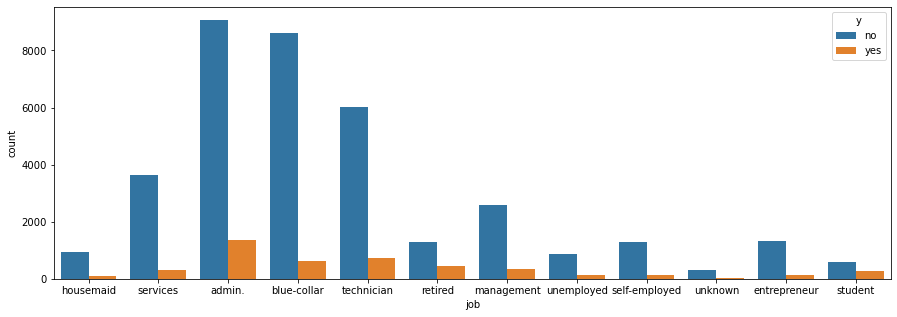

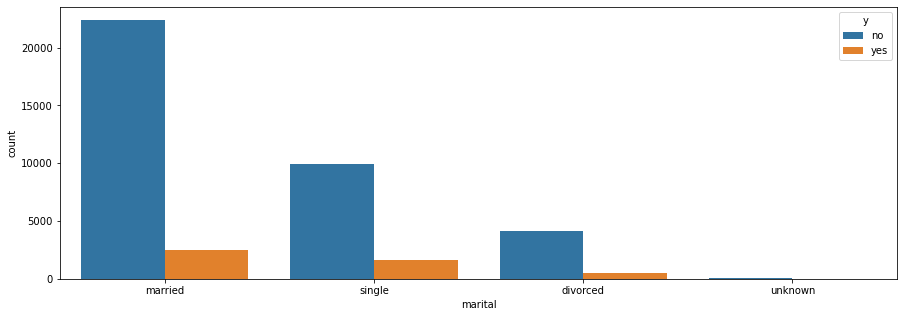

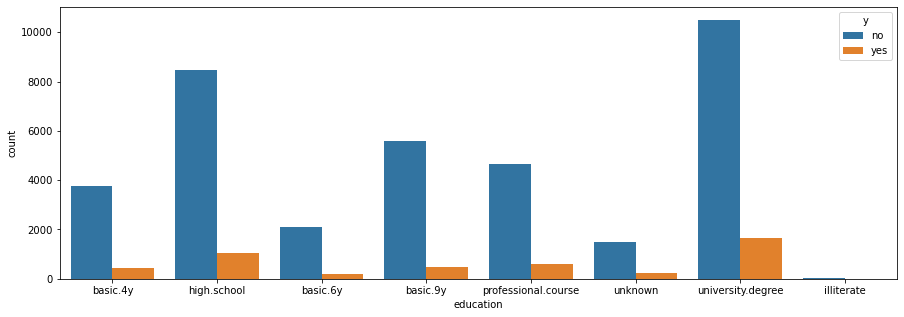

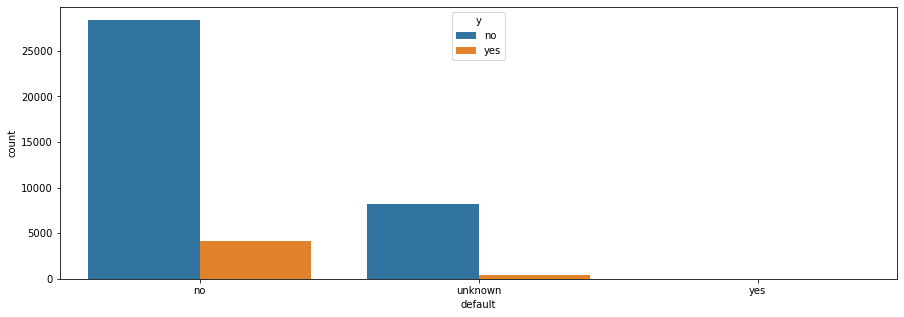

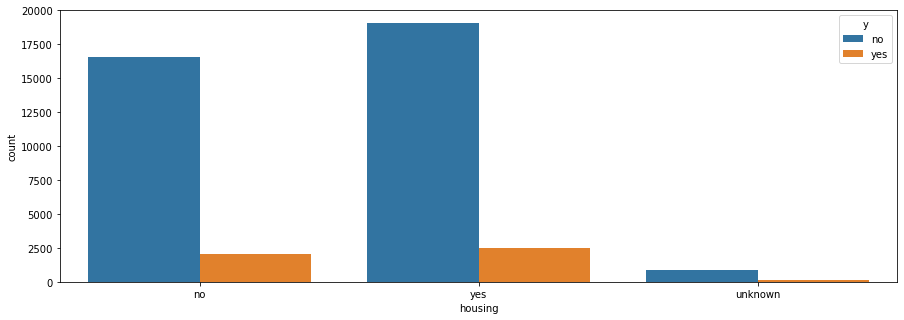

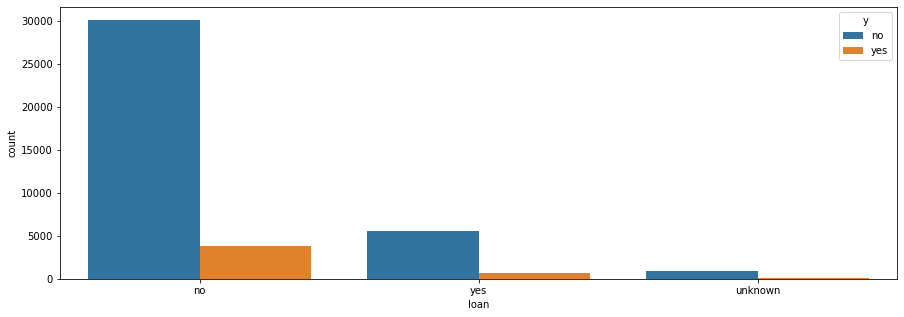

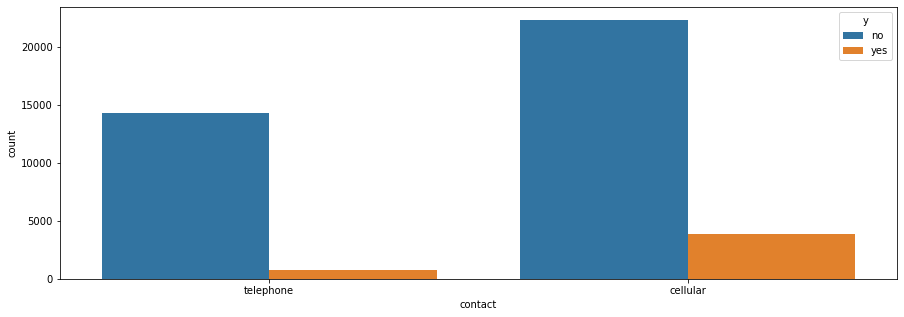

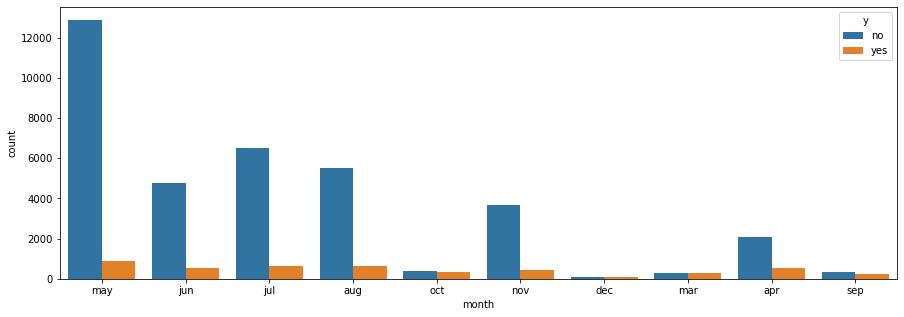

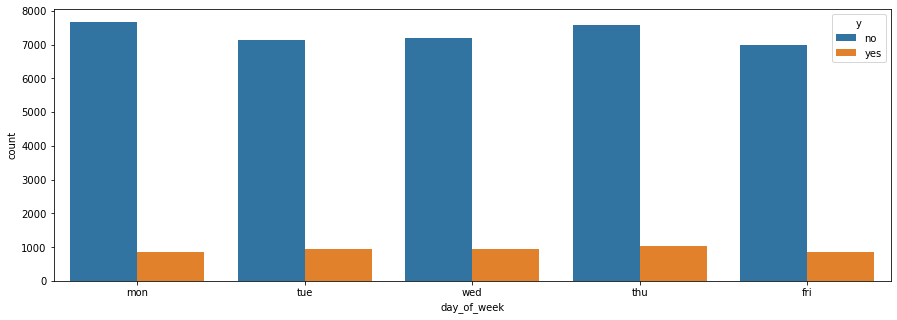

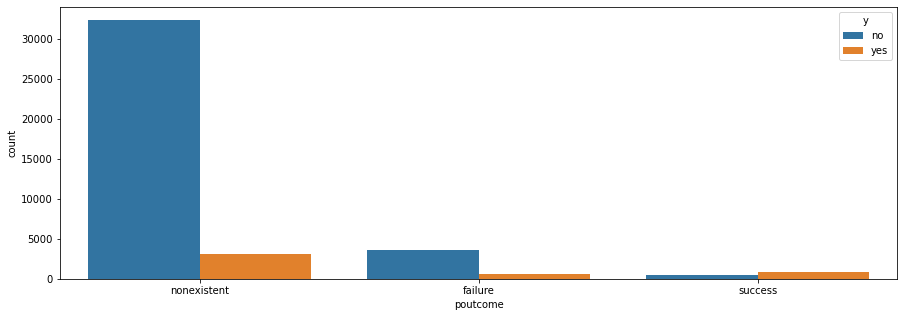

In [42]:
for i in cat_col:
    plt.figure(figsize=(15,5))
    sns.countplot(x_cat[i],hue=y)

In [43]:
from scipy.stats import pearsonr

In [64]:
for i in x_num_con.columns:
    print(i)
    
    for j in x_num_con.columns:
        if i != j:
            
            p = pearsonr(x_num_con[i],x_num_con[j])
            if p[1]>= 0.05:
                print(j,"corr->",p[0],"prob->",p[1],'-> insignificant')
            else:
                print(j,"corr->",p[0],"prob->",p[1],'-> significant')
    print("\n")

age
duration corr-> -0.000865705010140945 prob-> 0.8605390363787685 -> insignificant
emp.var.rate corr-> -0.00037068546744102116 prob-> 0.9400335506106786 -> insignificant
cons.price.idx corr-> 0.0008567149710781517 prob-> 0.8619726789476296 -> insignificant
cons.conf.idx corr-> 0.1293716142462093 prob-> 3.3810000909111904e-153 -> significant
euribor3m corr-> 0.01076742954167445 prob-> 0.028872118104160863 -> significant
nr.employed corr-> -0.017725131911928992 prob-> 0.000321342044319001 -> significant


duration
age corr-> -0.000865705010140945 prob-> 0.8605390363787685 -> insignificant
emp.var.rate corr-> -0.027967884489332604 prob-> 1.3709999857807868e-08 -> significant
cons.price.idx corr-> 0.005312267762747468 prob-> 0.28099339995383654 -> insignificant
cons.conf.idx corr-> -0.008172872813929722 prob-> 0.09718679348900189 -> insignificant
euribor3m corr-> -0.03289665570187407 prob-> 2.4235067000539775e-11 -> significant
nr.employed corr-> -0.04470322316242182 prob-> 1.11912691558

### 
emp.var.rate is insignificant with the age , so we can drop all remaining columns

In [65]:
df.groupby(['default','y'])['y'].count()

default  y  
no       no     28391
         yes     4197
unknown  no      8154
         yes      443
yes      no         3
Name: y, dtype: int64

In [66]:
df.groupby(['loan','y'])['y'].count()

loan     y  
no       no     30100
         yes     3850
unknown  no       883
         yes      107
yes      no      5565
         yes      683
Name: y, dtype: int64

In [67]:
df.groupby(['housing','y'])['y'].count()

housing  y  
no       no     16596
         yes     2026
unknown  no       883
         yes      107
yes      no     19069
         yes     2507
Name: y, dtype: int64

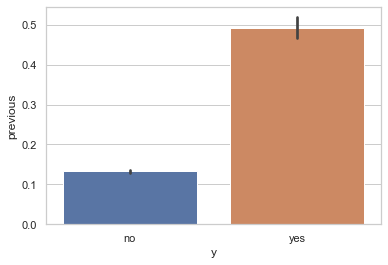

In [68]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="y", y="previous", data=df)

In [73]:
x_num.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [55]:
x_cat_nominal_dum = pd.get_dummies(x_cat_nominal,drop_first=True)

In [57]:
x_cat_nominal_dum 

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,0,1,0,0
41184,1,0,0,0,0,0,0,0,0,0,0,1,0,0
41185,0,0,0,0,1,0,0,0,0,0,0,1,0,0
41186,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [58]:
x_num

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [59]:
x_cat_ordinal_en

,education,poutcome,default,housing,loan
0,0,1,0,0,0
1,3,1,1,0,0
2,3,1,0,2,0
3,1,1,0,0,0
4,3,1,0,0,2
...,...,...,...,...,...
41183,5,1,0,2,0
41184,5,1,0,0,0
41185,6,1,0,2,0
41186,5,1,0,0,0


In [60]:
filtered_data = pd.concat([x_cat_ordinal_en,x_cat_nominal_dum,x_num.drop(['duration',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],axis=1)],axis=1)

In [61]:
filtered_data

,education,poutcome,default,housing,loan,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,age,campaign,pdays,previous,emp.var.rate
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,56,1,999,0,1.1
1,3,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,57,1,999,0,1.1
2,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,37,1,999,0,1.1
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,40,1,999,0,1.1
4,3,1,0,0,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,56,1,999,0,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,73,1,999,0,-1.1
41184,5,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,46,1,999,0,-1.1
41185,6,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,56,2,999,0,-1.1
41186,5,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,44,1,999,0,-1.1


In [62]:
y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [64]:
y = y.replace({'no':0,'yes':1})

In [65]:
x_train,x_test,y_train,y_test=train_test_split(filtered_data,y,test_size=0.3,random_state=0)

In [66]:
x_train.head()

,education,poutcome,default,housing,loan,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,age,campaign,pdays,previous,emp.var.rate
31880,6,1,1,0,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,37,1,999,0,-1.8
38177,6,1,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,54,1,999,0,-3.4
2459,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,49,2,999,0,1.1
756,6,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,30,3,999,0,1.1
11275,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,23,1,999,0,1.4


In [67]:
x_test.head()

,education,poutcome,default,housing,loan,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,age,campaign,pdays,previous,emp.var.rate
15500,2,1,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,39,3,999,0,1.4
29034,0,1,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,55,2,999,0,-1.8
11199,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,39,1,999,0,1.4
22247,2,1,0,2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,56,7,999,0,1.4
27180,2,1,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,49,1,999,0,-0.1


In [68]:
y_test

15500    1
29034    0
11199    0
22247    0
27180    0
        ..
20920    0
15744    1
34965    0
4644     0
20742    1
Name: y, Length: 12357, dtype: int64

In [72]:
logmodel = LogisticRegression(max_iter=1000,verbose=1)

In [73]:
logmodel.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


LogisticRegression(max_iter=1000, verbose=1)

In [74]:
pred = logmodel.predict(x_train)

In [75]:
print(classification_report(pred,y_train))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     27835
           1       0.20      0.67      0.31       996

    accuracy                           0.90     28831
   macro avg       0.60      0.79      0.63     28831
weighted avg       0.96      0.90      0.92     28831



In [76]:
log_pred_test = logmodel.predict(x_test)

In [77]:
print(classification_report(log_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.99      0.91      0.94     11928
           1       0.20      0.63      0.30       429

    accuracy                           0.90     12357
   macro avg       0.59      0.77      0.62     12357
weighted avg       0.96      0.90      0.92     12357



In [78]:
confusion_matrix(log_pred_test,y_test)

array([[10812,  1116],
       [  157,   272]], dtype=int64)

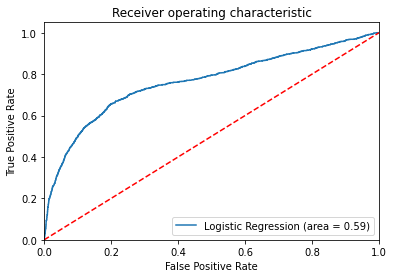

In [79]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC.pdf')
plt.show()

In [80]:
oversam = SMOTE()
x_sm, y_sm = oversam.fit_resample(x_train, y_train)

###  model building after smote

In [81]:
log_smote = LogisticRegression(max_iter=1000,verbose=1)

In [82]:
log_smote.fit(x_sm, y_sm)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished


LogisticRegression(max_iter=1000, verbose=1)

In [83]:
Log_train_sm = log_smote.predict(x_sm)

In [84]:
print(classification_report(Log_train_sm,y_sm ))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78     25870
           1       0.78      0.78      0.78     25288

    accuracy                           0.78     51158
   macro avg       0.78      0.78      0.78     51158
weighted avg       0.78      0.78      0.78     51158



In [85]:
Log_test = log_smote.predict(x_test)

In [86]:
print(classification_report(Log_test,y_test))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      9386
           1       0.53      0.25      0.33      2971

    accuracy                           0.77     12357
   macro avg       0.66      0.59      0.60     12357
weighted avg       0.73      0.77      0.73     12357



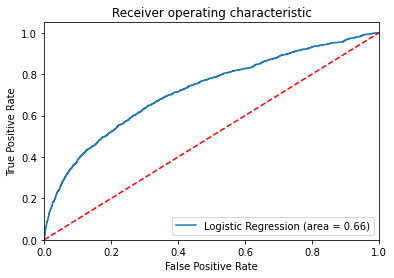

In [87]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_smote.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, log_smote.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC.pdf')
plt.show()

### 
KNN Model

In [88]:
knn_data = pd.concat([x_cat_ordinal_en,x_cat_nominal_dum,x_num],axis=1)

In [89]:
knn_data

,education,poutcome,default,housing,loan,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,3,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,3,1,0,0,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,5,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,6,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,5,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [90]:
x_train,x_test,y_train,y_test = train_test_split(knn_data,y,test_size=0.3,random_state=0)

In [103]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)
knn_train_pred =knn.predict(x_train)
knn_test_pred =knn.predict(x_test)
print("Train ->",classification_report(knn_train_pred,y_train))
print('\n')
print("Test",classification_report(knn_test_pred,y_test))

Train ->               precision    recall  f1-score   support

           0       0.97      0.95      0.96     26175
           1       0.60      0.73      0.66      2656

    accuracy                           0.93     28831
   macro avg       0.79      0.84      0.81     28831
weighted avg       0.94      0.93      0.93     28831



Test               precision    recall  f1-score   support

           0       0.96      0.94      0.95     11222
           1       0.49      0.60      0.54      1135

    accuracy                           0.91     12357
   macro avg       0.73      0.77      0.75     12357
weighted avg       0.92      0.91      0.91     12357



In [92]:
oversam = SMOTE()
x_sm, y_sm = oversam.fit_resample(x_train, y_train)

In [93]:
#after smote

In [94]:
ms = MinMaxScaler()

In [95]:
ms.fit(x_sm)

MinMaxScaler()

In [96]:
x_sm_scale = ms.transform(x_sm)
x_test_scale = ms.transform(x_test)

In [101]:
def knn(x_train,y_train,x_test,y_test):
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(x_train,y_train)
    knn_train_pred =knn.predict(x_train)
    knn_test_pred =knn.predict(x_test)
    print("After smote -> Train",classification_report(knn_train_pred,y_train))
    print('\n')
    print("After Smote-> Test",classification_report(knn_test_pred,y_test))

In [102]:
knn(x_sm_scale, y_sm,x_test_scale,y_test)

After smote -> Train               precision    recall  f1-score   support

           0       0.94      0.94      0.94     25677
           1       0.94      0.94      0.94     25481

    accuracy                           0.94     51158
   macro avg       0.94      0.94      0.94     51158
weighted avg       0.94      0.94      0.94     51158



After Smote-> Test               precision    recall  f1-score   support

           0       0.93      0.93      0.93     10908
           1       0.47      0.45      0.46      1449

    accuracy                           0.88     12357
   macro avg       0.70      0.69      0.69     12357
weighted avg       0.87      0.88      0.87     12357



In [105]:
def nb(x_train,y_train,x_test,y_test):
    gnb = GaussianNB()
    gnb.fit(x_train,y_train)
    gauss_pred_train = gnb.predict(x_train)
    gauss_pred_test = gnb.predict(x_test)
    print(classification_report(gauss_pred_train,y_train))
    print('\n')
    print(classification_report(gauss_pred_test,y_test))

In [106]:
nb(x_sm, y_sm,x_test,y_test)

              precision    recall  f1-score   support

           0       0.72      0.89      0.79     20763
           1       0.91      0.76      0.83     30395

    accuracy                           0.81     51158
   macro avg       0.81      0.82      0.81     51158
weighted avg       0.83      0.81      0.82     51158



              precision    recall  f1-score   support

           0       0.74      0.94      0.83      8572
           1       0.64      0.23      0.34      3785

    accuracy                           0.72     12357
   macro avg       0.69      0.59      0.58     12357
weighted avg       0.71      0.72      0.68     12357



In [107]:
nb(x_sm_scale, y_sm,x_test_scale,y_test)

              precision    recall  f1-score   support

           0       0.71      0.89      0.79     20599
           1       0.91      0.76      0.83     30559

    accuracy                           0.81     51158
   macro avg       0.81      0.82      0.81     51158
weighted avg       0.83      0.81      0.81     51158



              precision    recall  f1-score   support

           0       0.73      0.94      0.82      8505
           1       0.64      0.23      0.34      3852

    accuracy                           0.72     12357
   macro avg       0.69      0.59      0.58     12357
weighted avg       0.70      0.72      0.67     12357



In [108]:
nb(x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     23982
           1       0.55      0.37      0.45      4849

    accuracy                           0.84     28831
   macro avg       0.72      0.66      0.68     28831
weighted avg       0.83      0.84      0.83     28831



              precision    recall  f1-score   support

           0       0.89      0.94      0.91     10345
           1       0.55      0.38      0.45      2012

    accuracy                           0.85     12357
   macro avg       0.72      0.66      0.68     12357
weighted avg       0.83      0.85      0.84     12357



In [109]:
def SVM(x_train,y_train,x_test,y_test):
    svc = SVC()
    svc.fit(x_train,y_train)
    svc_pred_train =  svc.predict(x_train)
    svc_pred_test = svc.predict(x_test)
    print(classification_report(svc_pred_train,y_train))
    print(classification_report(svc_pred_test,y_test))

In [110]:
SVM(x_sm_scale, y_sm,x_test_scale,y_test)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     25303
           1       0.93      0.92      0.92     25855

    accuracy                           0.92     51158
   macro avg       0.92      0.92      0.92     51158
weighted avg       0.92      0.92      0.92     51158

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     10598
           1       0.62      0.49      0.54      1759

    accuracy                           0.88     12357
   macro avg       0.77      0.72      0.74     12357
weighted avg       0.87      0.88      0.88     12357



In [111]:
from sklearn.ensemble import AdaBoostClassifier

In [112]:
def ad(x_train,y_train,x_test,y_test):
    ad = AdaBoostClassifier()
    ad.fit(x_train,y_train) 
    ad_pred_train = ad.predict(x_train)
    ad_pred_test = ad.predict(x_test)
    print(classification_report(ad_pred_train,y_train))
    print(classification_report(ad_pred_test,y_test))

In [113]:
ad(x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     26851
           1       0.40      0.66      0.50      1980

    accuracy                           0.91     28831
   macro avg       0.69      0.80      0.73     28831
weighted avg       0.93      0.91      0.92     28831

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     11490
           1       0.42      0.68      0.52       867

    accuracy                           0.91     12357
   macro avg       0.70      0.80      0.74     12357
weighted avg       0.94      0.91      0.92     12357



In [114]:
ad(x_sm, y_sm,x_test,y_test)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     25361
           1       0.92      0.92      0.92     25797

    accuracy                           0.92     51158
   macro avg       0.92      0.92      0.92     51158
weighted avg       0.92      0.92      0.92     51158

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10562
           1       0.66      0.51      0.58      1795

    accuracy                           0.89     12357
   macro avg       0.79      0.73      0.76     12357
weighted avg       0.88      0.89      0.89     12357



### 
Feature selection

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [116]:
def feat_sel(x,y):
    feature_select = SelectFromModel(RandomForestClassifier(n_estimators=50))
    feature_select.fit(x,y)
    feature_select.get_support()
    df5 = pd.DataFrame({"Feature_Name": x.columns, "Importance": feature_select.get_support()})
    a=df5.sort_values(["Importance"], ascending = False)
    return a

In [184]:
#important Feature fetched using randomforest

In [118]:
feat_sel(knn_data,y)

,Feature_Name,Importance
0,education,True
19,age,True
27,euribor3m,True
21,campaign,True
20,duration,True
28,nr.employed,True
6,job_entrepreneur,False
18,marital_unknown,False
2,default,False
26,cons.conf.idx,False


In [119]:
a = ["logistic","AdaBoostClassifier","SVM","Naive_bayes","KNN"]
accuracy_before_smote =  [0.90,0.91, 0.93,0.93,0.92]
accuracy_after_smote = [0.85,0.89, 0.90,0.76,0.87]

In [120]:
comp_table =  pd.DataFrame({'algorithm': a, 'accuracy before smote':accuracy_before_smote,'accuracy after smote':accuracy_after_smote })

In [121]:
comp_table

,algorithm,accuracy before smote,accuracy after smote
0,logistic,0.90,0.85
1,AdaBoostClassifier,0.91,0.89
2,SVM,0.93,0.90
3,Naive_bayes,0.93,0.76
4,KNN,0.92,0.87


###  Time series

In [122]:
ts = pd.read_csv('MonthWiseMarketArrivals_Clean.csv')

In [125]:
ts.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [124]:
ts.dtypes

market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

In [126]:
ts.index  = ts['date']

In [127]:
ts

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
January-2005,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
January-2006,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
January-2010,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
January-2011,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
January-2012,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
...,...,...,...,...,...,...,...,...,...,...
December-2011,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
December-2012,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
December-2013,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013


In [130]:
ts['market'].value_counts()

LASALGAON(MS)         242
PIMPALGAON(MS)        224
MANMAD(MS)            218
LONAND(MS)            211
MAHUVA(GUJ)           210
                     ... 
JALGAON(WHITE)          1
CHALLAKERE(KNT)         1
RAJAHMUNDRY(AP)         1
SRIGANGANAGAR(RAJ)      1
MEERUT(UP)              1
Name: market, Length: 120, dtype: int64

In [139]:
ts_nd = ts.loc[ts.market=='MUMBAI']

In [145]:
tsd = ts_nd['priceMod']

In [142]:
tsd

date
January-2004      849
January-2005      387
January-2006      402
January-2007      997
January-2008      448
                 ... 
December-2011     749
December-2012    1330
December-2013    1639
December-2014    1802
December-2015    1542
Name: priceMod, Length: 146, dtype: int64

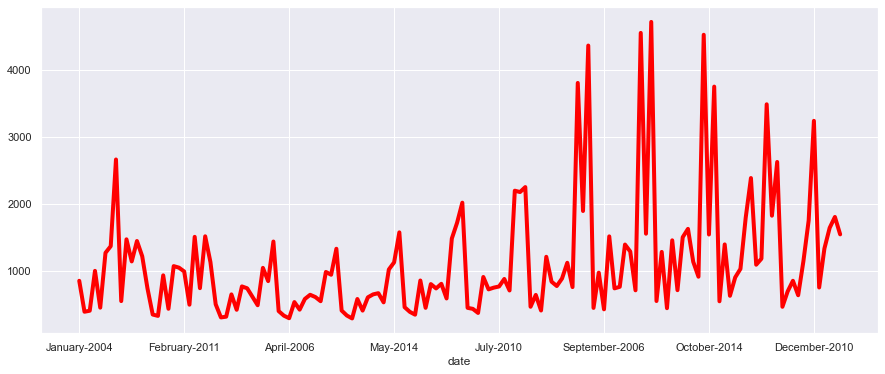

In [146]:
sns.set(rc={'figure.figsize':(15, 6)})
tsd.plot(linewidth=4.0, color = 'red')
plt.show()

In [147]:
ts = pd.read_csv('MonthWiseMarketArrivals_Clean.csv',index_col="date",parse_dates=True)

In [148]:
ts

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2005-01-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR
2006-01-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR
2010-01-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR
2011-01-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR
2012-01-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR
...,...,...,...,...,...,...,...,...,...
2011-12-01,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA
2012-12-01,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA
2013-12-01,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA


In [149]:
ts_nd = ts.loc[ts.market=='MUMBAI']

In [150]:
ts_nd

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2004-01-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI
2005-01-01,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI
2006-01-01,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI
2007-01-01,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI
2008-01-01,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI
...,...,...,...,...,...,...,...,...,...
2011-12-01,MUMBAI,December,2011,290350,519,994,749,MS,MUMBAI
2012-12-01,MUMBAI,December,2012,218500,1048,1609,1330,MS,MUMBAI
2013-12-01,MUMBAI,December,2013,226385,1298,1976,1639,MS,MUMBAI


In [153]:
tsd=ts_nd.loc[:,["priceMod"]]

In [162]:
tsd

,priceMod
date,
2004-01-01,849
2005-01-01,387
2006-01-01,402
2007-01-01,997
2008-01-01,448
...,...
2011-12-01,749
2012-12-01,1330
2013-12-01,1639


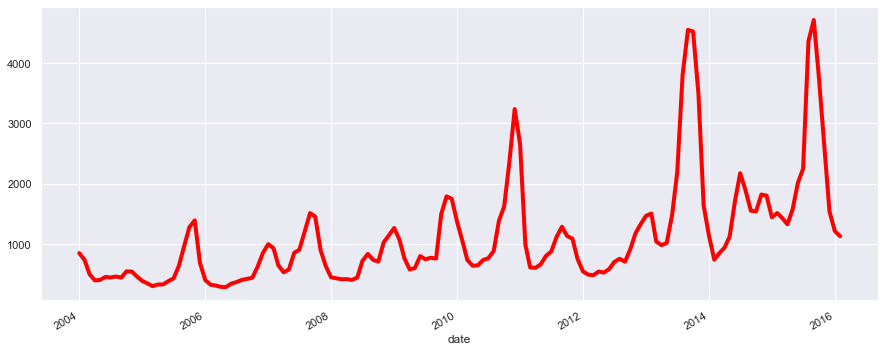

In [154]:
sns.set(rc={'figure.figsize':(15, 6)})
tsd["priceMod"].plot(linewidth=4.0, color = 'red')
plt.show()

In [156]:
tsd.diff(1).dropna()

,priceMod
date,
2005-01-01,-462.0
2006-01-01,15.0
2007-01-01,595.0
2008-01-01,-549.0
2009-01-01,818.0
...,...
2011-12-01,-2488.0
2012-12-01,581.0
2013-12-01,309.0


<AxesSubplot:xlabel='date'>

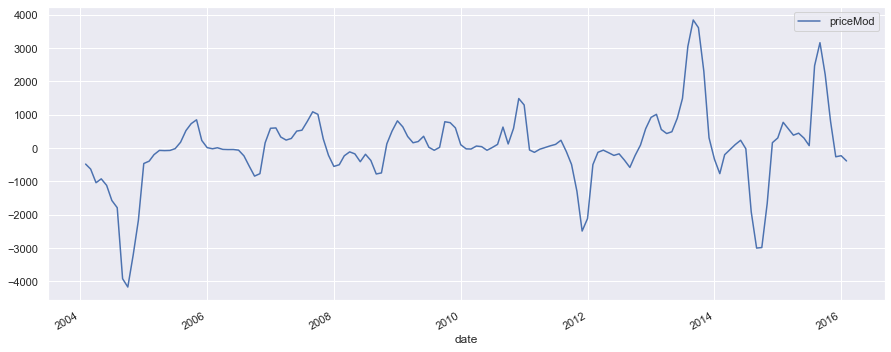

In [157]:
tsd.diff(1).dropna().plot.line()

<AxesSubplot:xlabel='date'>

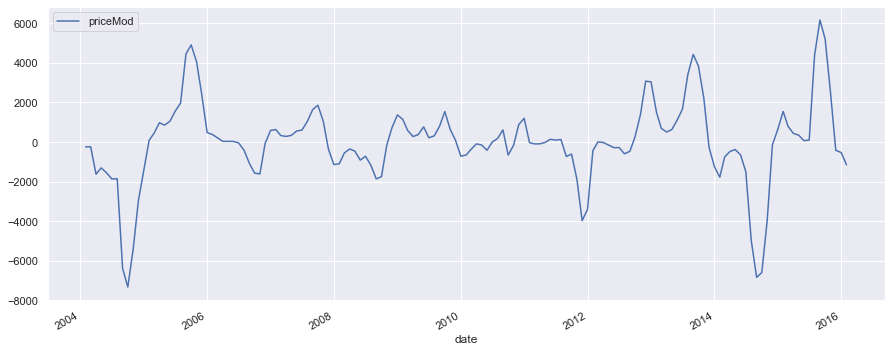

In [158]:
tsd.diff(1).diff(1).dropna().plot.line()

In [159]:
from statsmodels.tsa.api import  SimpleExpSmoothing
from statsmodels.tsa.api import  Holt

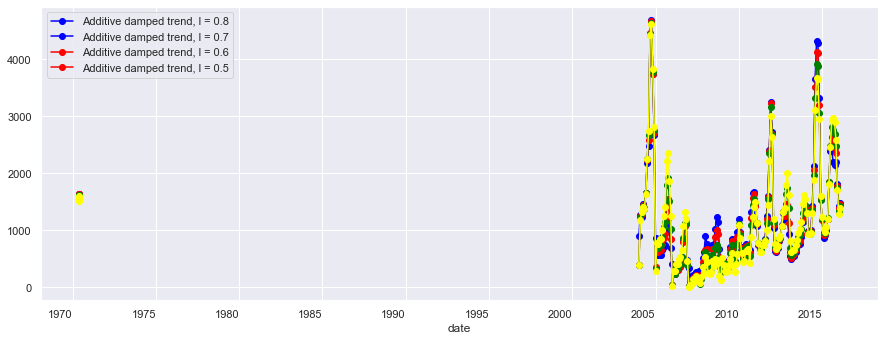

In [161]:
fit1_h = Holt(tsd.priceMod, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast1_h = fit1_h.forecast(4).rename("Additive damped trend, l = 0.8")

fit2_h = Holt(tsd.priceMod, damped=True).fit(smoothing_level=0.7, smoothing_slope=0.3)
fcast2_h = fit2_h.forecast(4).rename("Additive damped trend, l = 0.7")

fit3_h = Holt(tsd.priceMod, damped=True).fit(smoothing_level=0.6, smoothing_slope=0.4)
fcast3_h = fit3_h.forecast(4).rename("Additive damped trend, l = 0.6")

fit4_h = Holt(tsd.priceMod, damped=True).fit(smoothing_level=0.5, smoothing_slope=0.5)
fcast4_h = fit4_h.forecast(4).rename("Additive damped trend, l = 0.5")


fit1_h.fittedvalues.plot(marker="o", color='blue')
fcast1_h.plot(color='blue', marker="o", legend=True)
fit2_h.fittedvalues.plot(marker="o", color='red')
fcast2_h.plot(color='red', marker="o", legend=True)
fit3_h.fittedvalues.plot(marker="o", color='green')
fcast3_h.plot(color='green', marker="o", legend=True)
fit4_h.fittedvalues.plot(marker="o", color='yellow')
fcast4_h.plot(color='yellow', marker="o", legend=True)

plt.show()

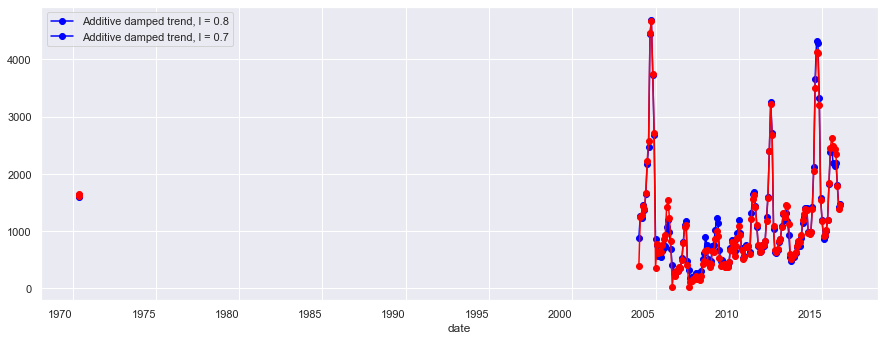

In [163]:
fit1_h = Holt(tsd.priceMod, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast1_h = fit1_h.forecast(4).rename("Additive damped trend, l = 0.8")

fit2_h = Holt(tsd.priceMod, damped=True).fit(smoothing_level=0.7, smoothing_slope=0.3)
fcast2_h = fit2_h.forecast(4).rename("Additive damped trend, l = 0.7")

fit1_h.fittedvalues.plot(marker="o", color='blue')
fcast1_h.plot(color='blue', marker="o", legend=True)
fit2_h.fittedvalues.plot(marker="o", color='red')
fcast2_h.plot(color='red', marker="o", legend=True)

plt.show()

In [165]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [168]:
ExponentialSmoothing(tsd,trend="add",seasonal="mul",seasonal_periods=12).fit().summary()

Dep. Variable:,priceMod,No. Observations:,146
Model:,ExponentialSmoothing,SSE,30793696.248
Optimized:,True,AIC,1821.845
Trend:,Additive,BIC,1869.583
Seasonal:,Multiplicative,AICC,1827.231
Seasonal Periods:,12,Date:,"Sun, 24 Jan 2021"
Box-Cox:,False,Time:,00:01:38
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0757143,alpha,True
smoothing_trend,0.0108163,beta,True


In [172]:
train_model = ExponentialSmoothing(tsd,trend="add",seasonal="mul",seasonal_periods=12).fit()

In [173]:
forecast = train_model.forecast(steps=12)

In [174]:
forecast

146     403.044209
147     646.058666
148     748.757407
149     567.724905
150    1002.742176
151    1521.236088
152    2734.591622
153     638.578591
154    1106.188370
155    1449.338694
156    1526.376984
157    1985.387561
dtype: float64

In [171]:
ExponentialSmoothing(tsd.iloc[:-12,:],trend="add",seasonal="mul",seasonal_periods=12).fit().summary()

Dep. Variable:,priceMod,No. Observations:,134
Model:,ExponentialSmoothing,SSE,24875101.510
Optimized:,True,AIC,1657.626
Trend:,Additive,BIC,1703.992
Seasonal:,Multiplicative,AICC,1663.574
Seasonal Periods:,12,Date:,"Sun, 24 Jan 2021"
Box-Cox:,False,Time:,00:04:02
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0403574,alpha,True
smoothing_trend,0.0403574,beta,True


### acf = Ma 1 2, pacf = AR
(P-ar,i-diff,q-ma)
213

In [180]:
train=tsd.iloc[:-12,:]

In [181]:
train_model=ExponentialSmoothing(train,trend="add",seasonal="mul",seasonal_periods=12).fit()

In [182]:
forecasted=train_model.forecast(steps=12)

In [183]:
final=train["priceMod"].append(forecasted,ignore_index=True)

In [188]:
final.index=tsd.index

In [190]:
from statsmodels.tsa.stattools import adfuller

In [191]:
X = tsd.priceMod.values
result = adfuller(X)
print('ADF Statistic: %.3f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, abs(value)))

ADF Statistic: -0.819
p-value: 0.813505
Critical Values:
	1%: 3.481
	5%: 2.884
	10%: 2.579


In [192]:
#above one is not stationary

In [193]:
result[4]

{'1%': -3.4808880719210005,
 '5%': -2.8836966192225284,
 '10%': -2.5785857598714417}

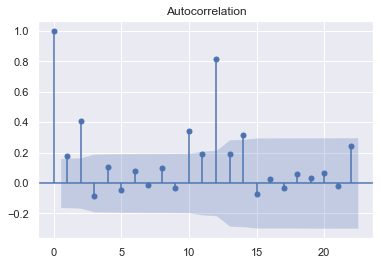

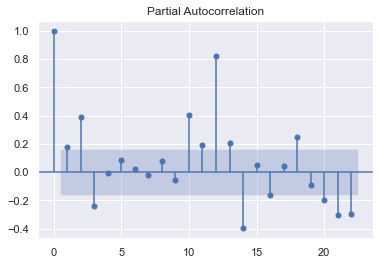

In [198]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(tsd['priceMod'])
plot_pacf(tsd['priceMod'])
plt.show()

### 
acf  -> MA -> 2 <br>
pacf -> AR -> 3 <br>
i = 1

In [199]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
ml=[]
for i  in range(1,3):
    for j in range(1,3):
        model5 = ARIMA(np.log(df.x),(i,1,j))
        model_fit5 = model5.fit()
        #print(model_fit5.aic())
        ml.append(['aic->',model_fit5.aic,'com->',i,1,j])
print(ml)

In [202]:
model5 = ARIMA(np.log(tsd.priceMod),(3,1,2))
model_fit5 = model5.fit()
print(model_fit5.aic)


243.8736518592179


In [206]:
X1 = (np.log(tsd.priceMod) - np.log(tsd.priceMod).shift(1)).dropna().values
X11 = (np.log(tsd.priceMod) - np.log(tsd.priceMod).shift(1)).values
X2 = (tsd.priceMod -tsd.priceMod.shift(1)).dropna().values
result = adfuller(X1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

result = adfuller(X2)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.035791
p-value: 0.031685
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
ADF Statistic: -4.486153
p-value: 0.000208
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.579


In [211]:
model5 = ARIMA(np.log(tsd.priceMod),(3,1,2))
model_fit5 = model5.fit()
print(model_fit5.aic)

243.8736518592179


In [203]:
frc =  model_fit5.fittedvalues

In [204]:
frc

date
2005-01-01    0.004473
2006-01-01    0.431730
2007-01-01   -0.075363
2008-01-01   -0.117541
2009-01-01    0.450029
                ...   
2011-12-01   -0.585814
2012-12-01    0.512947
2013-12-01   -0.451108
2014-12-01    0.179353
2015-12-01   -0.228482
Length: 145, dtype: float64

In [207]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(X2, frc)
print('MAE: %f' % mae)

MAE: 696.624776


In [209]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(X2, frc)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 1132.166500


In [210]:
fcs = model_fit5.forecast(10)
print(fcs)

(array([7.27815176, 7.19069546, 7.22990136, 7.22948986, 7.27400627,
       7.26506779, 7.2827963 , 7.27013268, 7.28305945, 7.27816615]), array([0.53018302, 0.55393929, 0.58515218, 0.59214825, 0.59368776,
       0.59566039, 0.60134374, 0.60143795, 0.60660691, 0.60678221]), array([[6.23901214, 8.31729139],
       [6.10499439, 8.27639652],
       [6.08302417, 8.37677856],
       [6.06890062, 8.3900791 ],
       [6.11039964, 8.4376129 ],
       [6.09759488, 8.4325407 ],
       [6.10418423, 8.46140837],
       [6.09133595, 8.44892941],
       [6.09413176, 8.47198714],
       [6.08889486, 8.46743743]]))


In [212]:
fcs[0]

array([7.27815176, 7.19069546, 7.22990136, 7.22948986, 7.27400627,
       7.26506779, 7.2827963 , 7.27013268, 7.28305945, 7.27816615])